## Read the data where the description has been processed (lemmatized, stop word not removed, no stemming)

In [72]:
import pandas as pd
import os

project_folder="C:/Users/hanson/OneDrive/Grad/Grad Project/data_realtorCA/"
output_folder=project_folder+"output"

df=pd.read_csv(output_folder+"/"+"all_after_preprocessingLem.csv")

In [73]:
len(df)

10251

In [74]:
df.head()

MLS    price      city           communityName  \
0  W5238356   958800  Brampton  Sandringham-Wellington   
1  W5226917   970000  Brampton       Downtown Brampton   
2  W5226514  1249900  Brampton  Fletcher's Creek South   
3  W5234770  1249900  Brampton         Fletcher's West   
4  W5234047  1249900  Brampton         Fletcher's West   

                              address  postal  \
0            232 BRUSSELS AVEBrampton  L6Z0G1   
1  #LOT 12 -57 MCMURCHY AVE SBrampton  L6Y1Y6   
2          208 ROLLINGWOOD DRBrampton  L6Y5J6   
3              92 MOFFATT AVEBrampton  L6Y4K8   
4          85 WHITE TAIL CRESBrampton  L6Y5C1   

                                         description     typeBuilding  \
0  beautiful bright and spacious home in the hear...            House   
1  this is an assignment sale sunfield community ...  Row / Townhouse   
2  location location border of mississauga 4 bedr...            House   
3  premium corner lot 4 bedroom plus 2 bedroom fi...            House   
4  beautiful detached house with 4 bedroom and 4 ...            House   

         title  bedroomAboveGrade  ...  PlaygroundNearby  ShoppingNearby  \
0     Freehold                  4  ...             False           False   
1  Condominium                  3  ...             False           False   
2     Freehold                  4  ...             False           False   
3     Freehold                  4  ...             False           False   
4     Freehold                  4  ...             False           False   

   PublicTransitNearby  HighwayNearby  bedroom bathroom  longitude latitude  \
0                 True          False        5      4.0   -79.7953  43.7328   
1                 True          False        3      4.0   -79.7876  43.6249   
2                 True          False        7      4.0   -79.7876  43.6249   
3                 True          False        6      4.0   -79.7876  43.6249   
4                False          False        4      4.0   -79.7876  43.6249   

  misterious_number  total_words  
0          28454310          117  
1          28404652           91  
2          28403072           89  
3          28439785           73  
4          28434998           76  

[5 rows x 96 columns]

In [75]:
df['description'] = df['description'].astype(str)


In [76]:
df['description'].dtype

dtype('O')

In [77]:
df['description']

0        beautiful bright and spacious home in the hear...
1        this is an assignment sale sunfield community ...
2        location location border of mississauga 4 bedr...
3        premium corner lot 4 bedroom plus 2 bedroom fi...
4        beautiful detached house with 4 bedroom and 4 ...
                               ...                        
10246    incredible clanton park opportunity awaits ste...
10247    available for the first time from original own...
10248    gorgeous corner 2 bedroom 2 bathroom loft in t...
10249    a wychwood dream completely renovated with per...
10250    limestone exterior with art gallery interior a...
Name: description, Length: 10251, dtype: object

## tokenization again

In [78]:
from nltk.tokenize import RegexpTokenizer
tokeniser = RegexpTokenizer(r'\w+')
df["description"]=df["description"].apply(lambda x: tokeniser.tokenize(x))

## Remove Stop Words

from nltk.corpus import stopwords
stopwords_nltk=stopwords.words('english')

real_estate_stopwords = [
    #"area",
    "province",
    #"location",
    #"plot",
    ## common measurement
    #"hectare",
    #"acre",
    #"m2",
    #"sq",
    #"sale",
    #"square",
    #"meter",
    #"metre",
    #"feet",
    #"foot",
    ## common rooms
    #"room",
    #"bedroom",
    #"bathroom",
    #"bath",
    #"washroom",
    #"dining",
    #"living",
    #"kitchen",
    
    #"hallway",
    #"corridor",
    
    ## common occurance
    "extra"
    
    ## type of the building
    #"apartment",
    #"condo",
    #"condominium",
    #"home",
    #"house",
    #"unit",
    ## describe the appliances, too common
    #"stainless",
    #"steel",
    ## common appliances
    #"washer",
    #"dryer",
    #"stove",
    #"fridge"
    ]

all_stop_words=stopwords_nltk+real_estate_stopwords

df["description"]=df["description"].apply(lambda x: [word for word in x if word not in stopwords_nltk] )

## check unique words

In [79]:
df["description"]

0        [beautiful, bright, and, spacious, home, in, t...
1        [this, is, an, assignment, sale, sunfield, com...
2        [location, location, border, of, mississauga, ...
3        [premium, corner, lot, 4, bedroom, plus, 2, be...
4        [beautiful, detached, house, with, 4, bedroom,...
                               ...                        
10246    [incredible, clanton, park, opportunity, await...
10247    [available, for, the, first, time, from, origi...
10248    [gorgeous, corner, 2, bedroom, 2, bathroom, lo...
10249    [a, wychwood, dream, completely, renovated, wi...
10250    [limestone, exterior, with, art, gallery, inte...
Name: description, Length: 10251, dtype: object

In [80]:
df["description"]=df["description"].apply(lambda x: " ".join(word for word in x))

In [81]:
# Unique words
uniqueWords = list(set(" ".join(df['description']).split(" ")))
count = len(uniqueWords)
print("Number of unique words is: "+str(count))

Number of unique words is: 15428


## check n-gram, and word cloud

## check 1-gram

In [82]:
import nltk
## This is the list of all the words in the description column
totalWords = list(" ".join(df['description']).split(" "))

(pd.Series(nltk.ngrams(totalWords, 1)).value_counts())[:20]

(and,)        47276
(with,)       24863
(to,)         22222
(the,)        19605
(a,)          19269
(in,)         18205
(bedroom,)    11814
(of,)         11463
(2,)          10852
(room,)        9924
(all,)         9515
(floor,)       8749
(extra,)       8511
(kitchen,)     8009
(1,)           7548
(home,)        7397
(for,)         6745
(this,)        6633
(window,)      6297
(fridge,)      6246
dtype: int64

## check 2-gram

In [83]:
import nltk
(pd.Series(nltk.ngrams(totalWords, 2)).value_counts())[:20]

(stainless, steel)    5352
(and, a)              3803
(in, the)             3519
(square, foot)        3214
(fridge, stove)       2837
(window, covering)    2822
(kitchen, with)       2792
(open, concept)       2735
(washer, dryer)       2723
(close, to)           2648
(washer, and)         2444
(and, dryer)          2390
(light, fixture)      2366
(a, half)             2300
(walk, out)           2164
(steel, appliance)    2099
(to, the)             2082
(of, the)             2061
(2, bedroom)          1982
(main, floor)         1950
dtype: int64

## check 3-gram

In [84]:
(pd.Series(nltk.ngrams(totalWords, 3)).value_counts())[:20]

(washer, and, dryer)             2363
(and, a, half)                   2288
(stainless, steel, appliance)    2077
(fridge, stove, dishwasher)      1467
(stainless, steel, fridge)       1444
(walk, out, to)                  1386
(all, window, covering)          1167
(extra, stainless, steel)        1133
(hot, water, tank)               1060
(the, heart, of)                  943
(walk, in, closet)                918
(walking, distance, to)           905
(in, the, heart)                  888
(floor, to, ceiling)              820
(electric, light, fixture)        815
(dishwasher, washer, dryer)       810
(extra, fridge, stove)            794
(washer, dryer, all)              770
(and, dryer, all)                 755
(finished, basement, with)        726
dtype: int64

## check 4-gram

In [85]:
(pd.Series(nltk.ngrams(totalWords, 4)).value_counts())[:20]

(in, the, heart, of)                      883
(washer, and, dryer, all)                 751
(floor, to, ceiling, window)              714
(extra, stainless, steel, fridge)         709
(stainless, steel, fridge, stove)         695
(dishwasher, washer, and, dryer)          611
(fridge, stove, dishwasher, washer)       588
(all, electric, light, fixture)           504
(stove, dishwasher, washer, dryer)        417
(extra, fridge, stove, dishwasher)        416
(steel, fridge, stove, dishwasher)        383
(fridge, stove, dishwasher, microwave)    377
(all, electrical, light, fixture)         368
(stainless, steel, fridge, stainless)     357
(steel, fridge, stainless, steel)         357
(walk, in, closet, and)                   348
(close, to, all, amenity)                 343
(with, stainless, steel, appliance)       342
(and, a, half, bathroom)                  332
(eat, in, kitchen, with)                  331
dtype: int64

## word cloud for all description data

In [86]:
text = " ".join(des for des in df.description)
print ("There are {} words in the combination of all description.".format(len(text)))


There are 6311389 words in the combination of all description.


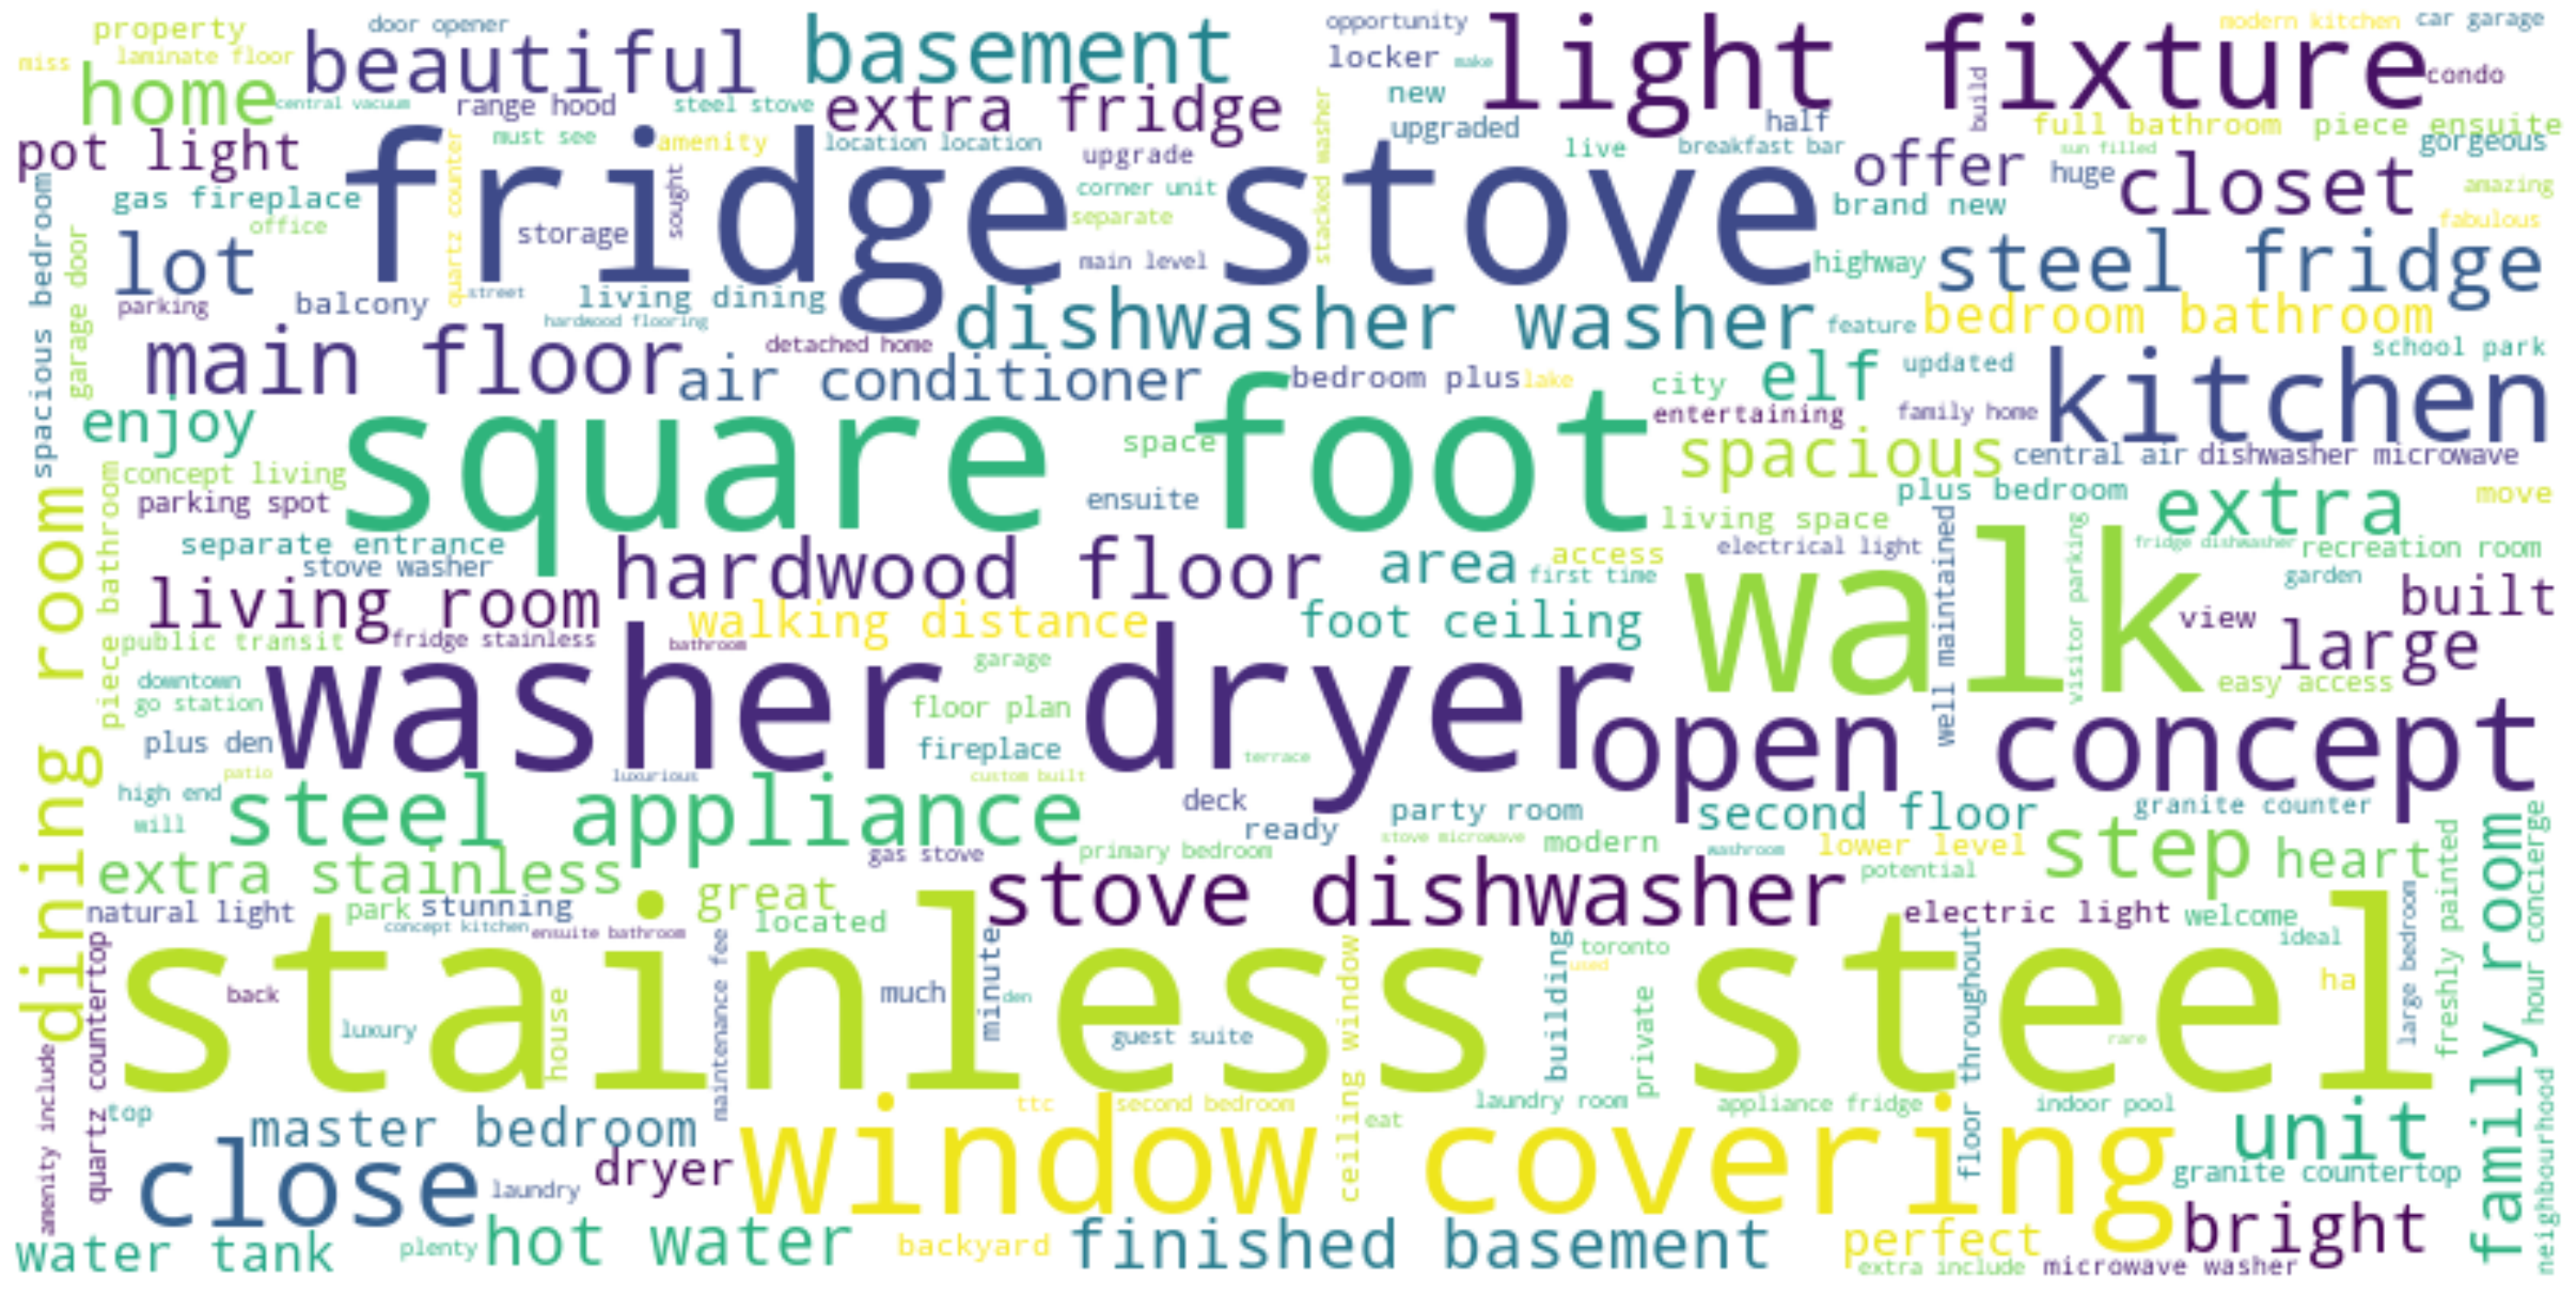

In [87]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)#max_font_size=100, max_words=500,

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (50, 50))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [88]:
df.price.describe()

count    1.025100e+04
mean     1.290212e+06
std      1.844750e+06
min      8.790000e+04
25%      6.290000e+05
50%      8.588000e+05
75%      1.300000e+06
max      4.900000e+07
Name: price, dtype: float64

## word cloud for cheap 5%=515 listings

In [89]:
df_5cheapest=df.sort_values(by=["price"])[:516]

There are 314404 words in the combination of all description.


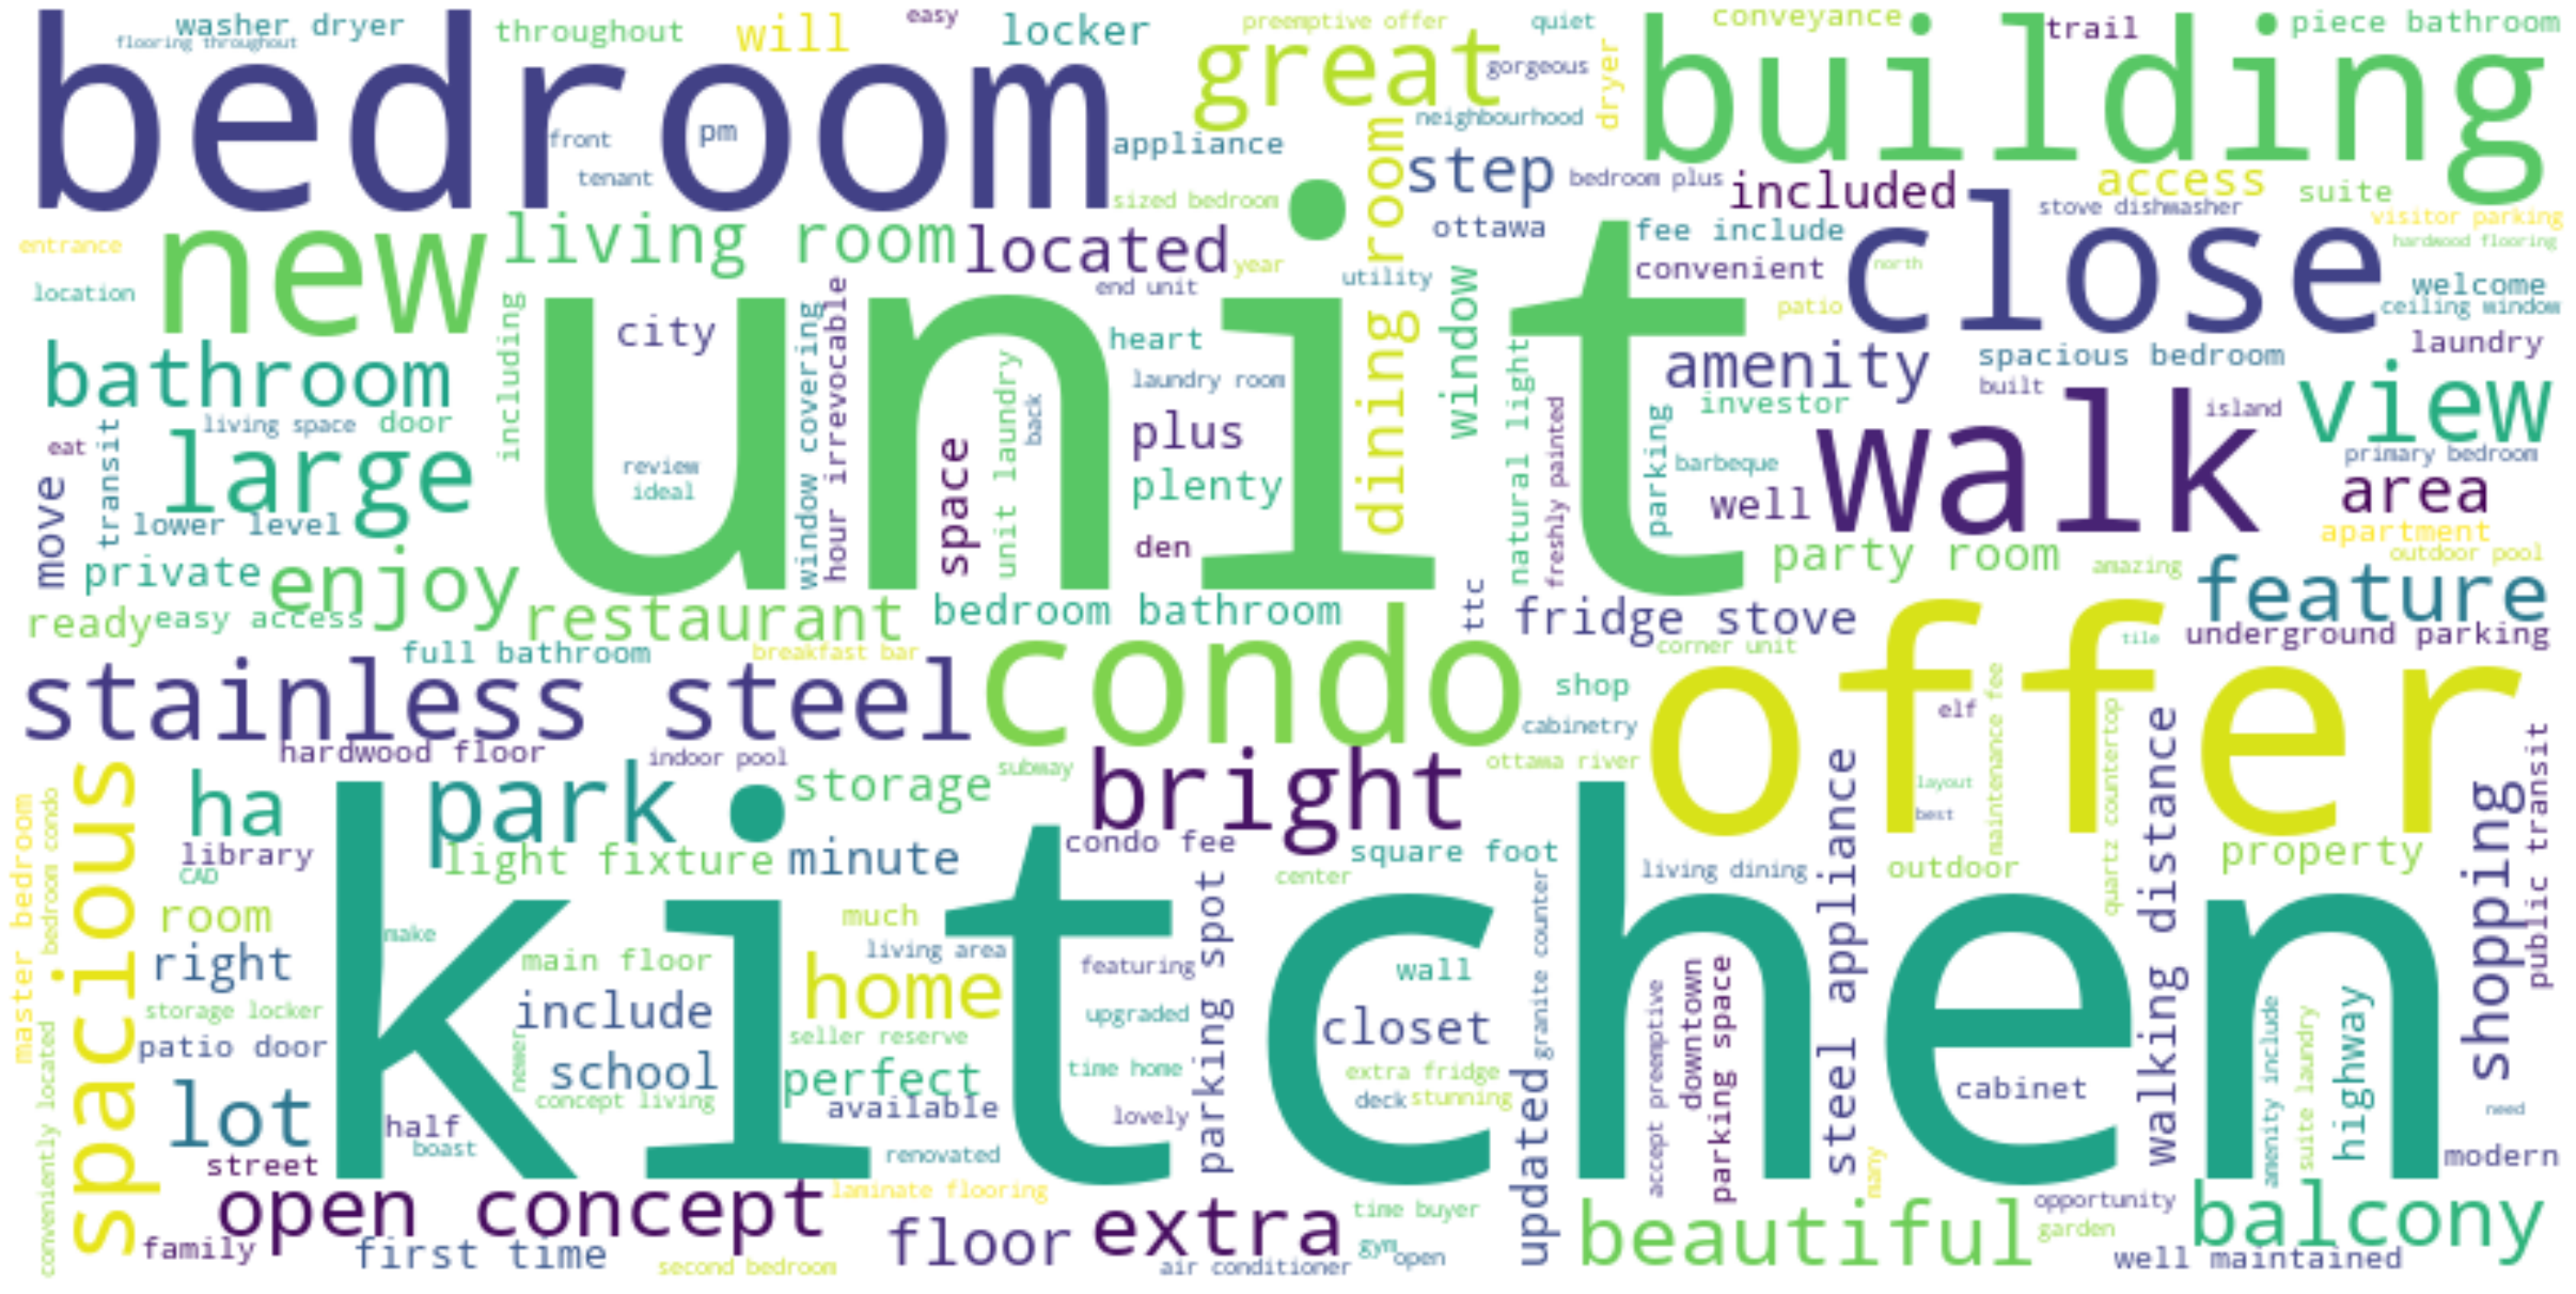

In [90]:
text = " ".join(des for des in df_5cheapest.description)
print ("There are {} words in the combination of all description.".format(len(text)))

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)#max_font_size=100, max_words=500,

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (50, 50))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## word cloud for middle price 1000 listings

In [91]:
df_100middle=df.sort_values(by=["price"])[5000:6001]

There are 611401 words in the combination of all description.


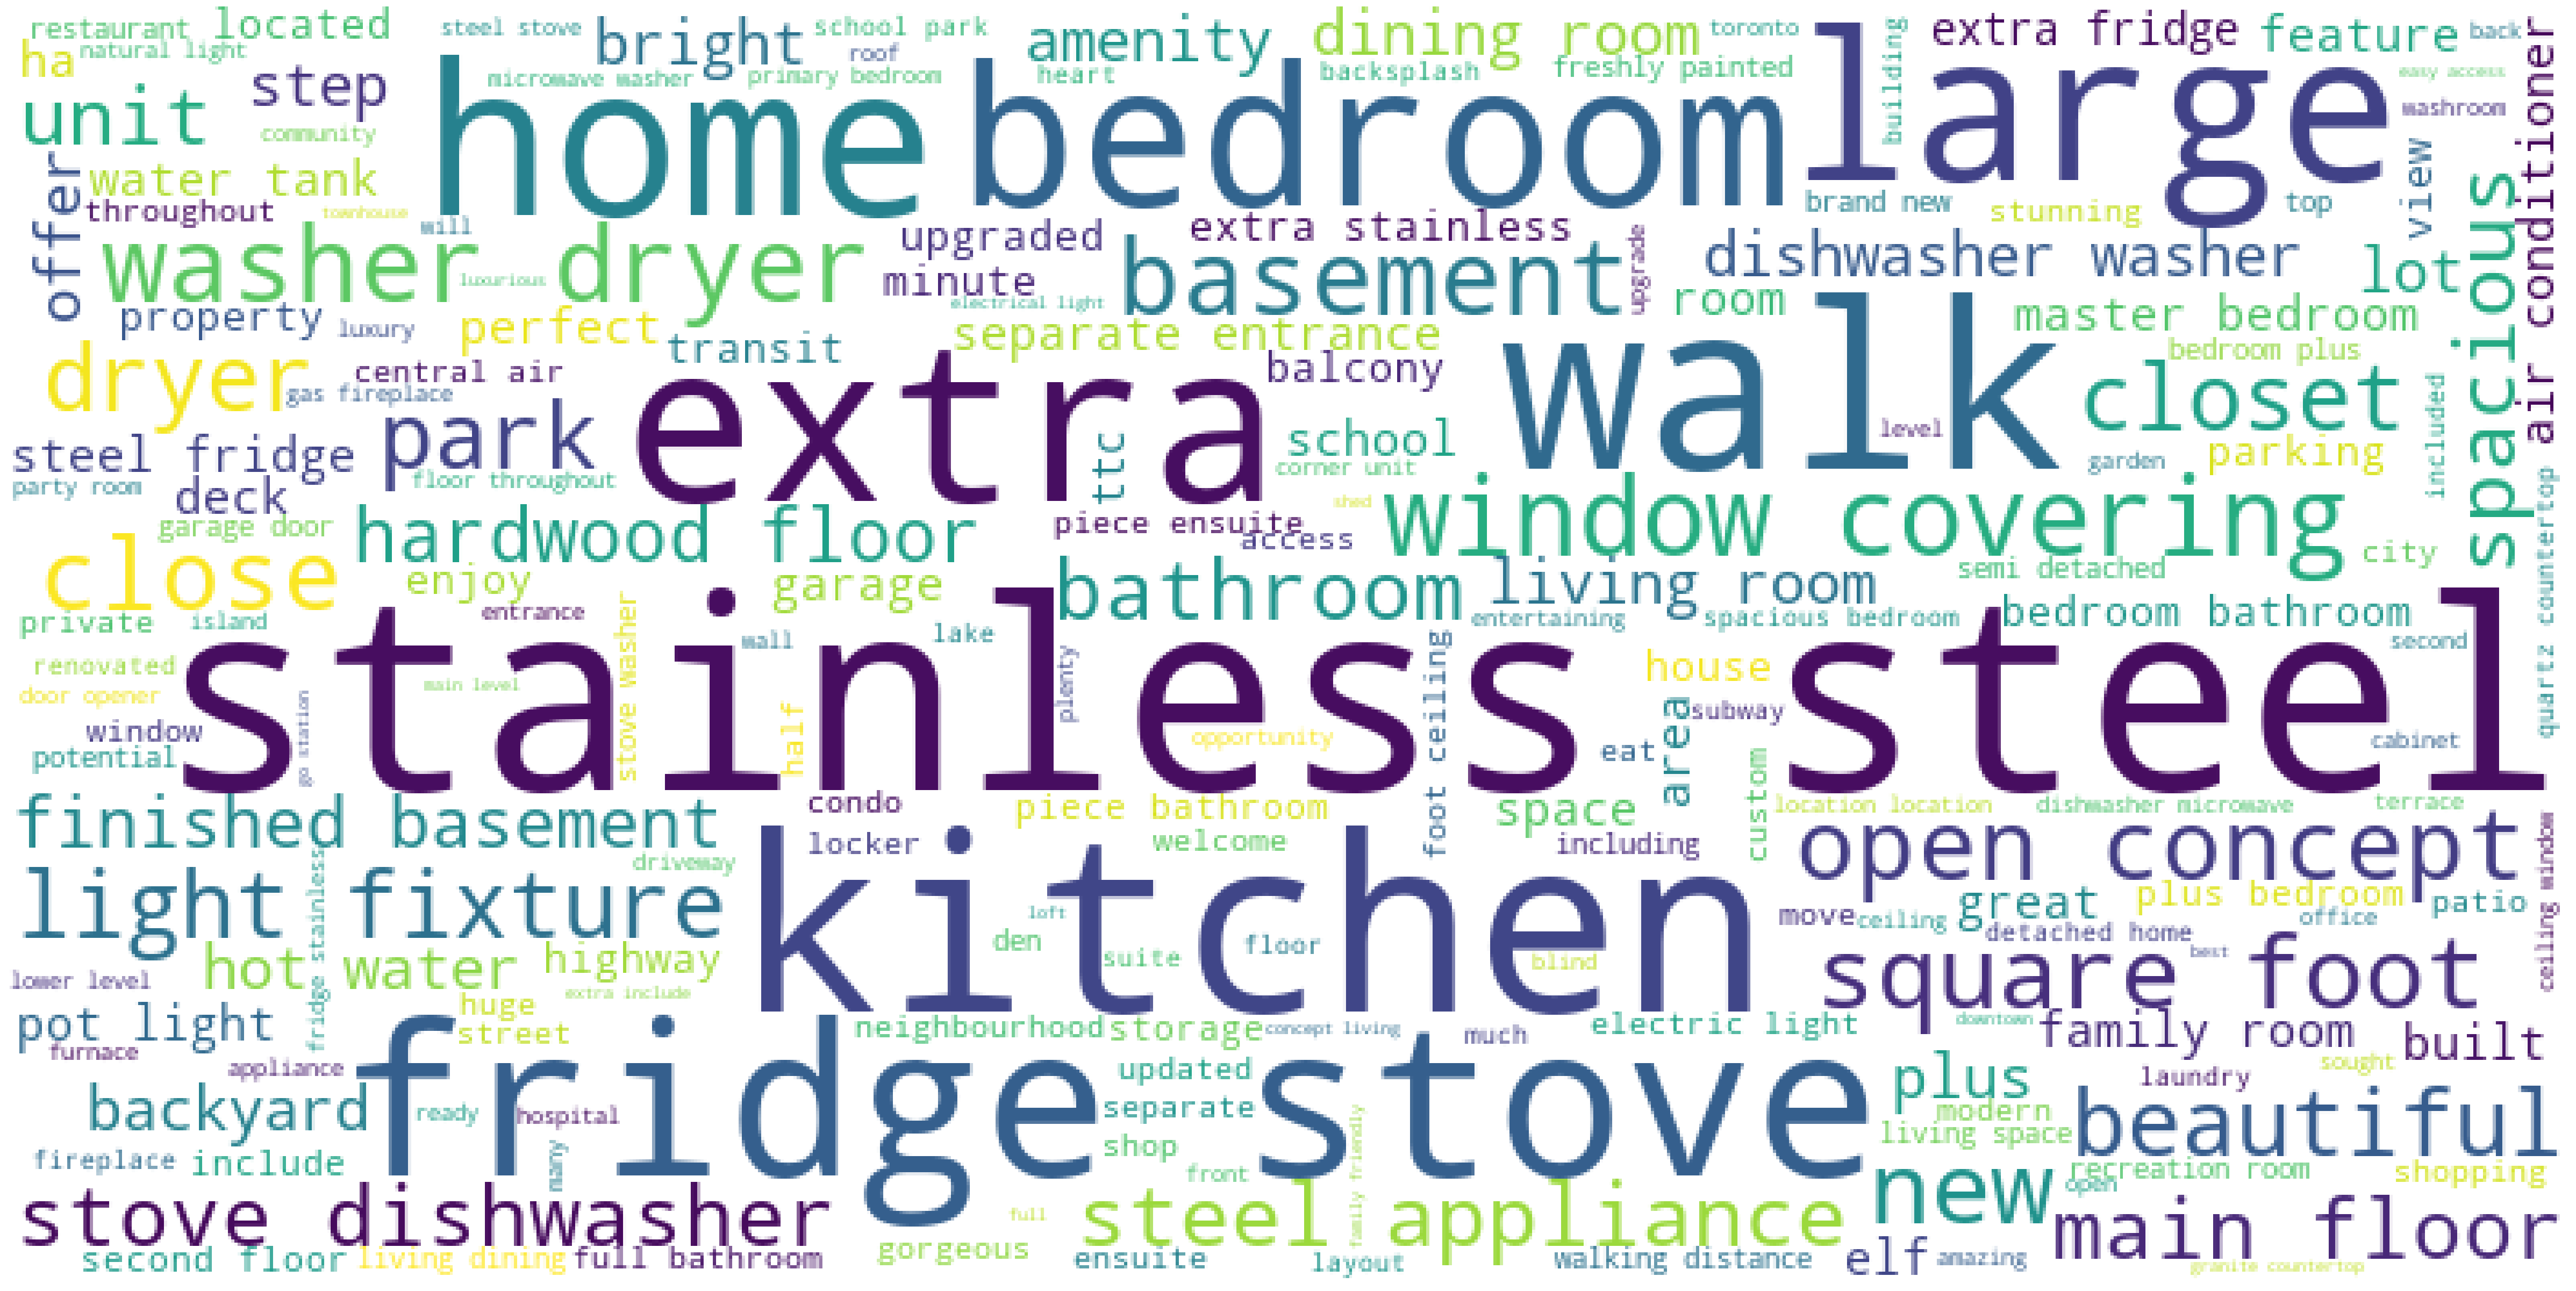

In [92]:
text = " ".join(des for des in df_100middle.description)
print ("There are {} words in the combination of all description.".format(len(text)))

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)#max_font_size=100, max_words=500,

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (100, 100))
plt.imshow(wordcloud, interpolation='None')
plt.axis("off")
plt.show()


## word cloud for most expensive 5%=515 listings

In [93]:
df_5highest=df.sort_values(by=["price"], ascending=False)[:516]

There are 328437 words in the combination of all description.


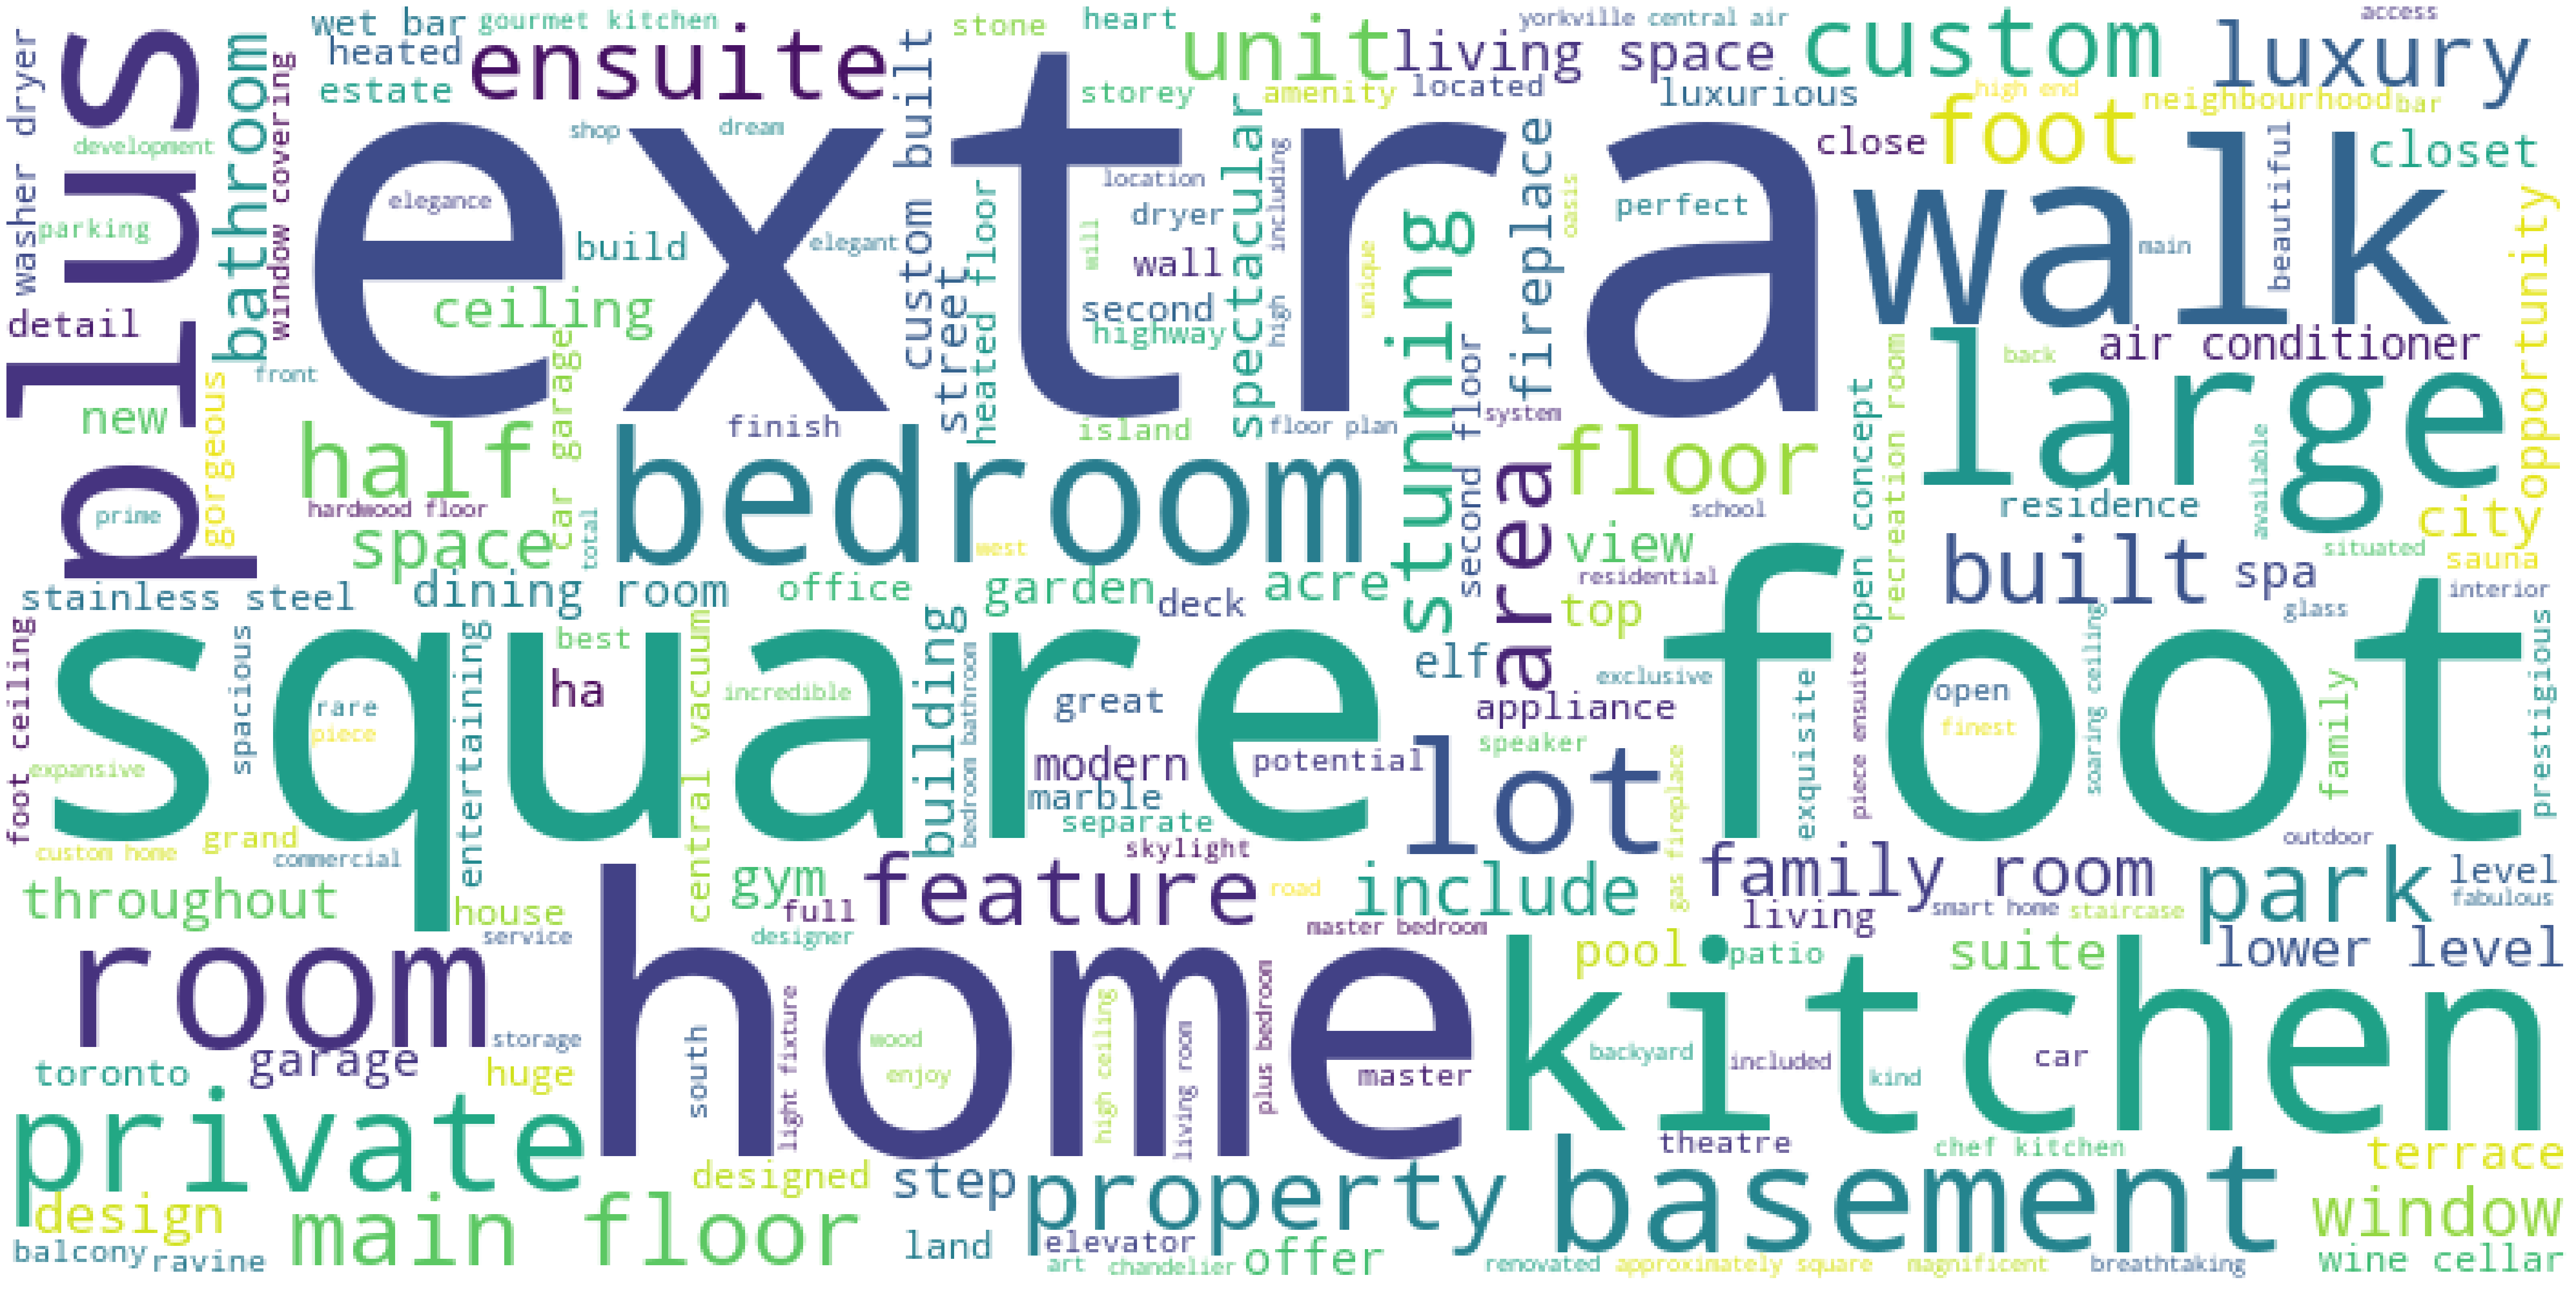

In [94]:
text = " ".join(des for des in df_5highest.description)
print ("There are {} words in the combination of all description.".format(len(text)))

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)#max_font_size=100, max_words=500,

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (100, 100))
plt.imshow(wordcloud, interpolation='None')
plt.axis("off")
plt.show()


## Word2Vec

In [95]:
from gensim.models import Word2Vec

## Convert description words to vectors using pre-trained google news word2vec

## check the list of available pre-trained word vector models

import gensim.downloader as api

print(list(api.info()['models'].keys()))

## load pre-trained model

model = api.load("glove-twitter-200")
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

## Or, train the word2vec using description data

## create list of sentences(sentence contain list of words)

import gensim
corpus = df["description"]

## create list of lists of unigrams
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) 
               for i in range(0, len(lst_words), 1)]
    lst_corpus.append(lst_grams)

## detect bigrams and trigrams
bigrams_detector = gensim.models.phrases.Phrases(lst_corpus, 
                 delimiter=" ".encode(), min_count=5, threshold=10)
bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[lst_corpus], 
            delimiter=" ".encode(), min_count=5, threshold=10)
trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)


len(lst_corpus)

## train a Word2Vec model from scratch

import gensim
# let X be a list of tokenized texts (i.e. list of lists of tokens)
model = gensim.models.Word2Vec(lst_corpus, size=300, window=8, min_count=1, sg=1, iter=30)
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

model.save(output_folder+"/w2v.model")

In [97]:
from gensim.models import Word2Vec
model=Word2Vec.load(output_folder+"/w2v.model")
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

<ipython-input-97-a8922990a2bc>:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  w2v = dict(zip(model.wv.index2word, model.wv.syn0))


## define the word2vec vectorizer

In [98]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))
        

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([np.mean([self.word2vec[w] for w in words if w in self.word2vec] or [np.zeros(self.dim)], axis=0) for words in X])

In [99]:
len(next(iter(w2v.values())))

300

## tokenize

In [100]:
from nltk.tokenize import RegexpTokenizer
tokeniser = RegexpTokenizer(r'\w+')
df["description"]=df["description"].apply(lambda x: tokeniser.tokenize(x))

In [101]:
listt=df.description.head()
for words in listt:
    print(words)
    for w in words:
        print(w)
        if w in w2v:
            print("yes it is in word2vec")
        else:
            print("no it is not")
        print("----")

['beautiful', 'bright', 'and', 'spacious', 'home', 'in', 'the', 'heart', 'lake', 'community', 'right', 'off', 'highway', '410', 'approximately', '2450', 'square', 'foot', 'of', 'living', 'space', '670', 'square', 'foot', 'in', 'basement', 'with', '4', 'bedroom', 'and', '4', 'washroom', 'separate', 'entrance', 'through', 'garage', 'to', 'basement', 'with', 'full', 'bathroom', 'potential', 'for', 'great', 'rental', 'income', 'hardwood', 'pot', 'light', 'and', 'california', 'shutter', 'throughout', 'freshly', 'painted', 'open', 'concept', 'floor', 'plan', 'with', 'eat', 'in', 'kitchen', 'stainless', 'steel', 'appliance', 'minute', 'to', 'trinity', 'common', 'mall', 'park', 'heart', 'lake', 'conservation', 'and', 'much', 'more', 'extra', 'stainless', 'steel', 'stove', 'fridge', 'dishwasher', 'washer', 'and', 'dryer', 'water', 'heater', 'rental', 'all', 'existing', 'light', 'and', 'hardwood', 'throughout', 'concrete', 'pad', 'leading', 'from', 'the', 'front', 'to', 'the', 'backyard', 'can',

## Get price and normalize price

In [102]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
labels_price = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df["price"])))

In [103]:
labels_price.shape

(10251, 1)

## Try use only description data to predict

## divide dataset into training data and testing data

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df["description"], labels_price, test_size=0.1, random_state=46) #random state=13 originally

## build the pipeline model with gradient boosting

In [105]:
import numpy as np 
from sklearn import ensemble


params = {'n_estimators': 1000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg = ensemble.GradientBoostingRegressor(**params)#**params
y_train_flat=np.ravel(y_train)

from sklearn.pipeline import Pipeline
graboo_w2v = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("gradient boosting", reg)])

In [106]:
## convert X_train to numpy, might be not necessary
X_train=X_train.values

## check what the transformed vectors look like

In [107]:
X_train.shape

(9225,)

In [108]:
MEV=MeanEmbeddingVectorizer(w2v)
transformed_X_train=MEV.transform(X_train)

In [109]:
transformed_X_train

array([[ 0.0183249 ,  0.0160959 , -0.07475654, ...,  0.00851042,
         0.07106982, -0.05178969],
       [ 0.04448564,  0.12446488, -0.09202349, ..., -0.0889845 ,
         0.0117644 , -0.04921803],
       [ 0.05969034,  0.06791764, -0.06751713, ...,  0.06636414,
         0.09603232, -0.05329368],
       ...,
       [ 0.04244129,  0.09022436, -0.00265952, ..., -0.01724888,
         0.06803098, -0.05135558],
       [ 0.08894556,  0.02647993, -0.07517472, ...,  0.05344427,
         0.08979861, -0.04908981],
       [ 0.07861953,  0.03578002, -0.08533965, ...,  0.02529514,
         0.12659116, -0.06243422]], dtype=float32)

In [110]:
transformed_X_train.shape

(9225, 300)

## Grid Search
### Long Short Term Memory, when only description data is used

#### Function to create model, required for KerasClassifier

In [111]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD

def create_model(learn_rate=0.001, amsgrad=False, activation='relu', dropout_rate=0.0, neurons=50):
    # create model
    # The maximum number of words to be used. (most frequent)
    #MAX_NB_WORDS = 50000
    # embedding dimension
    #EMBEDDING_DIM = 100
    #model.add(Dense(1024, activation='relu', input_shape=(X_train.shape[1],)))
    #model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
    #model.add(LSTM(50))

    model = Sequential()
    model.add(Dense(neurons, activation=activation)) #input_shape=(X_train.shape[1],), return_sequences = True
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons*2, activation=activation))
    model.add(Dropout(dropout_rate/2))
    model.add(Dense(neurons, activation=activation))

    
    model.add(Dense(1,activation ='sigmoid')) #, activation='sigmoid'

    # Compile model
    optimizer = Adam(learning_rate=learn_rate, amsgrad=amsgrad)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# split into input (X) and output (Y) variables
# create model
model = KerasRegressor(build_fn=create_model, verbose=10) #epochs=75, batch_size=10, verbose=10)
# define the grid search parameters
#optimizer = ['Adam'] 
batch_size = [10,20] # 5, 
epochs = [50, 75, 100] # ,
learn_rate = [0.0001,0.001,0.01] #0.0001, , 0.01
amsgrad = [False] # True,  #True,
activation = ['relu', 'sigmoid']#, 'softplus'] #, 'sigmoid','softplus'] #, , 'softsign', 'hard_sigmoid', 'softmax', #, 'linear' 
dropout_rate = [0.1,0.2] #,0.3]#, 0.2] #0.0,, 0.3, 0.5 0.4, 0.2,, 0.3, 0.4, 0.5, 0.7
neurons = [50, 100] #25, 50, 100, 150,300, 200


param_grid = dict(batch_size=batch_size, epochs=epochs, learn_rate=learn_rate, amsgrad=amsgrad, activation=activation, dropout_rate=dropout_rate, neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=10, scoring=('r2', 'neg_root_mean_squared_error'), refit='r2')
grid_result = grid.fit(transformed_X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/1

In [112]:
print("-------------------------------------------------------------------")
print("Neural Network Grid Search Results")
print("-------------------------------------------------------------------")
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
print("\n The best r2 score across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)
print("\n")
print("-------------------------------------------------------------------")
print("All Results:") 

param_com=grid.cv_results_['params']
r2_scores=grid.cv_results_['mean_test_r2']
rmse_scores=grid.cv_results_['mean_test_neg_root_mean_squared_error']
print("-------------------------------------------------------------------")
index=0
for item in param_com:
    print("parameter combinations:"+str(item))
    print("\n")
    print("test r2 score:"+str(r2_scores[index]))
    print("\n")
    print("test RMSE score:"+str(rmse_scores[index]*-1))
    print("-------------------------------------------------------------------")
    index=index+1


-------------------------------------------------------------------
Neural Network Grid Search Results
-------------------------------------------------------------------

 The best estimator across ALL searched params:

 The best r2 score across ALL searched params:
 0.6015708938504023

 The best parameters across ALL searched params:
 {'activation': 'relu', 'amsgrad': False, 'batch_size': 10, 'dropout_rate': 0.2, 'epochs': 100, 'learn_rate': 0.0001, 'neurons': 100}


-------------------------------------------------------------------
All Results:
-------------------------------------------------------------------
parameter combinations:{'activation': 'relu', 'amsgrad': False, 'batch_size': 10, 'dropout_rate': 0.1, 'epochs': 50, 'learn_rate': 0.0001, 'neurons': 50}


test r2 score:0.5561929677043469


test RMSE score:0.02324910684560515
-------------------------------------------------------------------
parameter combinations:{'activation': 'relu', 'amsgrad': False, 'batch_size': 10, 

In [113]:
gd_result = pd.DataFrame(grid.cv_results_)
gd_result=gd_result[['param_batch_size','param_epochs', 'param_neurons','param_activation','param_learn_rate', 'param_dropout_rate', 'mean_test_r2','mean_test_neg_root_mean_squared_error'  ]]
gd_result=gd_result.sort_values(by=['mean_test_r2', 'mean_test_neg_root_mean_squared_error'], ascending=False)
gd_result.head(50)

param_batch_size param_epochs param_neurons param_activation  \
31                10          100           100             relu   
12                10          100            50             relu   
61                20           75           100             relu   
67                20          100           100             relu   
37                20           50           100             relu   
7                 10           75           100             relu   
87                10          100           100          sigmoid   
13                10          100           100             relu   
1                 10           50           100             relu   
45                20           75           100             relu   
9                 10           75           100             relu   
81                10           75           100          sigmoid   
49                20          100           100             relu   
43                20           75           100             relu   
60                20           75            50             relu   
55                20           50           100             relu   
24                10           75            50             relu   
15                10          100           100             relu   
48                20          100            50             relu   
6                 10           75            50             relu   
66                20          100            50             relu   
3                 10           50           100             relu   
25                10           75           100             relu   
42                20           75            50             relu   
30                10          100            50             relu   
86                10          100            50          sigmoid   
124               20          100            50          sigmoid   
19                10           50           100             relu   
18                10           50            50             relu   
0                 10           50            50             relu   
21                10           50           100             relu   
140               20          100            50          sigmoid   
104               10          100            50          sigmoid   
36                20           50            50             relu   
141               20          100           100          sigmoid   
105               10          100           100          sigmoid   
98                10           75            50          sigmoid   
44                20           75            50             relu   
116               20           75            50          sigmoid   
111               20           50           100          sigmoid   
54                20           50            50             relu   
57                20           50           100             relu   
14                10          100            50             relu   
99                10           75           100          sigmoid   
135               20           75           100          sigmoid   
122               20          100            50          sigmoid   
93                10           50           100          sigmoid   
117               20           75           100          sigmoid   
92                10           50            50          sigmoid   
56                20           50            50             relu   

    param_learn_rate param_dropout_rate  mean_test_r2  \
31            0.0001                0.2      0.601571   
12            0.0001                0.1      0.600262   
61            0.0001                0.2      0.593079   
67            0.0001                0.2      0.592981   
37            0.0001                0.1      0.590865   
7             0.0001                0.1      0.590862   
87             0.001                0.1      0.589987   
13            0.0001                0.1      0.589955   
1             0.0001  

In [114]:
gd_result.to_csv(output_folder+"/"+"gridsearch_NN_w2v_descriptiononly_5fold_corrected.csv", index=False)

## Grid Search
### Random Forest, when only description data is used

In [102]:
import numpy as np
from sklearn import ensemble
GBR = ensemble.RandomForestRegressor()


parameters = {'bootstrap': [True, False],
              'max_depth': [5, 10, 20, 30, None],
              'max_features': ['auto', 'sqrt'],
              'n_estimators': [32, 64, 100, 500, 1000]}

y_train_flat=np.ravel(y_train)

from sklearn.model_selection import GridSearchCV
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters,scoring=('r2', 'neg_root_mean_squared_error'),refit='r2', verbose=10, cv = 5, n_jobs=-1)
grid_GBR.fit(transformed_X_train, y_train_flat)

print("-------------------------------------------------------------------")
print("Gradient Boosting Grid Search Results")
print("-------------------------------------------------------------------")
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best r2 score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)
print("\n")
print("-------------------------------------------------------------------")
print("All Results:") 

param_com=grid_GBR.cv_results_['params']
r2_scores=grid_GBR.cv_results_['mean_test_r2']
rmse_scores=grid_GBR.cv_results_['mean_test_neg_root_mean_squared_error']
print("-------------------------------------------------------------------")
index=0
for item in param_com:
    print("parameter combinations:"+str(item))
    print("\n")
    print("test r2 score:"+str(r2_scores[index]))
    print("\n")
    print("test RMSE score:"+str(rmse_scores[index]*-1))
    print("-------------------------------------------------------------------")
    index=index+1


df_gridsearch_result = pd.DataFrame(grid_GBR.cv_results_)


gd_result=df_gridsearch_result[['param_n_estimators','param_max_depth','param_max_features','param_bootstrap','mean_test_r2','mean_test_neg_root_mean_squared_error'  ]]

Fitting 5 folds for each of 100 candidates, totalling 500 fits
-------------------------------------------------------------------
Gradient Boosting Grid Search Results
-------------------------------------------------------------------

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      n_estimators=64)

 The best r2 score across ALL searched params:
 0.44943035310266255

 The best parameters across ALL searched params:
 {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 64}


-------------------------------------------------------------------
All Results:
-------------------------------------------------------------------
parameter combinations:{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 32}


test r2 score:0.28799095511547607


test RMSE score:0.029999230291973693
-------------------------------------------------------------------
p

In [103]:
gd_result=gd_result.sort_values(by=['mean_test_r2', 'mean_test_neg_root_mean_squared_error'], ascending=False)
gd_result.head(50)

param_n_estimators param_max_depth param_max_features param_bootstrap  \
86                 64              30               sqrt           False   
78                500              20               sqrt           False   
98                500            None               sqrt           False   
79               1000              20               sqrt           False   
99               1000            None               sqrt           False   
89               1000              30               sqrt           False   
88                500              30               sqrt           False   
77                100              20               sqrt           False   
87                100              30               sqrt           False   
95                 32            None               sqrt           False   
96                 64            None               sqrt           False   
76                 64              20               sqrt           False   
68                500              10               sqrt           False   
97                100            None               sqrt           False   
85                 32              30               sqrt           False   
69               1000              10               sqrt           False   
67                100              10               sqrt           False   
38                500              30               sqrt            True   
65                 32              10               sqrt           False   
75                 32              20               sqrt           False   
39               1000              30               sqrt            True   
29               1000              20               sqrt            True   
49               1000            None               sqrt            True   
36                 64              30               sqrt            True   
28                500              20               sqrt            True   
48                500            None               sqrt            True   
66                 64              10               sqrt           False   
37                100              30               sqrt            True   
27                100              20               sqrt            True   
47                100            None               sqrt            True   
26                 64              20               sqrt            True   
25                 32              20               sqrt            True   
46                 64            None               sqrt            True   
18                500              10               sqrt            True   
19               1000              10               sqrt            True   
45                 32            None               sqrt            True   
33                500              30               auto            True   
15                 32              10               sqrt            True   
44               1000            None               auto            True   
34               1000              30               auto            True   
23                500              20               auto            True   
24               1000              20               auto            True   
43                500            None               auto            True   
17                100              10               sqrt            True   
35                 32              30               sqrt            True   
31                 64              30               auto            True   
16                 64              10               sqrt            True   
32                100              30               auto            True   
22                100              20               auto            True   
14               1000              10               auto            True   

    mean_test_r2  mean_test_neg_root_mean_squared_error  
86      0.449430                              -0.026287  
78      0.

In [104]:
gd_result.to_csv(output_folder+"/"+"gridsearch_randomforest_w2v_selftrained_descriptiononly_5fold.csv", index=False)

## Grid Search
### Gradient Boosting, when only description data is used

In [40]:
import numpy as np
from sklearn import ensemble
GBR = ensemble.GradientBoostingRegressor()

parameters = {'n_estimators' : [500,1000], # 100 removed
              'max_depth'    : [4,6], # 3 removed
                                       #'min_samples_split': [2, 5, 8],
              'learning_rate': [0.01,0.02], # 0.005 removed
                                     #'loss': ['ls'], # remove huber loss
              'subsample'    : [1, 0.8] 
             }

y_train_flat=np.ravel(y_train)

from sklearn.model_selection import GridSearchCV
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters,scoring=('r2', 'neg_root_mean_squared_error'),refit='r2', verbose=10, cv = 10, n_jobs=-1)
grid_GBR.fit(transformed_X_train, y_train_flat)

print("-------------------------------------------------------------------")
print("Gradient Boosting Grid Search Results")
print("-------------------------------------------------------------------")
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best r2 score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)
print("\n")
print("-------------------------------------------------------------------")
print("All Results:") 

param_com=grid_GBR.cv_results_['params']
r2_scores=grid_GBR.cv_results_['mean_test_r2']
rmse_scores=grid_GBR.cv_results_['mean_test_neg_root_mean_squared_error']
print("-------------------------------------------------------------------")
index=0
for item in param_com:
    print("parameter combinations:"+str(item))
    print("\n")
    print("test r2 score:"+str(r2_scores[index]))
    print("\n")
    print("test RMSE score:"+str(rmse_scores[index]*-1))
    print("-------------------------------------------------------------------")
    index=index+1


df_gridsearch_result = pd.DataFrame(grid_GBR.cv_results_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
-------------------------------------------------------------------
Gradient Boosting Grid Search Results
-------------------------------------------------------------------

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=6, n_estimators=1000,
                          subsample=1)

 The best r2 score across ALL searched params:
 0.5219184359540014

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 1}


-------------------------------------------------------------------
All Results:
-------------------------------------------------------------------
parameter combinations:{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 1}


test r2 score:0.46727471868707726


test RMSE score:0.025437646996817182
-------------------------------------------------------------------
param

In [41]:
gd_result=df_gridsearch_result[['param_n_estimators','param_max_depth','param_learning_rate','param_subsample','mean_test_r2','mean_test_neg_root_mean_squared_error'  ]]#'param_min_samples_split','param_loss',

In [42]:
gd_result=gd_result.sort_values(by=['mean_test_r2', 'mean_test_neg_root_mean_squared_error'], ascending=False)
gd_result.head(50)

param_n_estimators param_max_depth param_learning_rate param_subsample  \
14               1000               6                0.02               1   
6                1000               6                0.01               1   
12                500               6                0.02               1   
7                1000               6                0.01             0.8   
4                 500               6                0.01               1   
11               1000               4                0.02             0.8   
15               1000               6                0.02             0.8   
10               1000               4                0.02               1   
13                500               6                0.02             0.8   
8                 500               4                0.02               1   
2                1000               4                0.01               1   
3                1000               4                0.01             0.8   
5                 500               6                0.01             0.8   
9                 500               4                0.02             0.8   
0                 500               4                0.01               1   
1                 500               4                0.01             0.8   

    mean_test_r2  mean_test_neg_root_mean_squared_error  
14      0.521918                              -0.024068  
6       0.520839                              -0.024076  
12      0.518205                              -0.024169  
7       0.507631                              -0.024468  
4       0.507101                              -0.024480  
11      0.506127                              -0.024511  
15      0.505685                              -0.024552  
10      0.499644                              -0.024592  
13      0.498668                              -0.024684  
8       0.493849                              -0.024746  
2       0.492418                              -0.024809  
3       0.488578                              -0.024939  
5       0.487429                              -0.025005  
9       0.484594                              -0.025051  
0       0.467275                              -0.025438  
1       0.455499                              -0.025744

In [44]:
gd_result.to_csv(output_folder+"/"+"gridsearch_gradientboosting_W2V_self_trained_descriptiononly_5fold.csv", index=False)

## Cross Validation

In [43]:
## Check how long it takes to finish the cross-validation
import time
tic = time.perf_counter()

In [44]:
from sklearn.model_selection import cross_validate
scores = cross_validate(graboo_w2v, X_train, y_train_flat, scoring=('r2', 'neg_root_mean_squared_error'), cv=10, return_train_score=True)

KeyboardInterrupt: 

In [ ]:
print("RMSE training Score using cv: {:0.5f}".format(scores['train_neg_root_mean_squared_error'].mean() * -1))

In [ ]:
print("RMSE test Score using cv: {:0.5f}".format(scores['test_neg_root_mean_squared_error'].mean() * -1))

In [ ]:
print("R2 training Score using cv: {:0.5f}".format(scores['train_r2'].mean() * -1))

In [ ]:
print("R2 test Score using cv: {:0.5f}".format(scores['test_r2'].mean() * -1))

In [ ]:
toc = time.perf_counter()
print(f"Finish cross validation in  {(toc - tic)/60:0.2f} minutes")

## Try to use all features to predict

## description word vectors


In [115]:
import numpy as np
MEV=MeanEmbeddingVectorizer(w2v)
transformed_X_train=MEV.transform(df["description"])

In [116]:
df_desc=pd.DataFrame(transformed_X_train)

In [117]:
df_desc.shape

(10251, 300)

In [118]:
df_desc.head()

0         1         2         3         4         5         6    \
0  0.060549  0.036668 -0.058878 -0.117148 -0.126613 -0.192840 -0.047669   
1  0.039721  0.053636 -0.032975 -0.144865 -0.094598 -0.165435 -0.053402   
2  0.123232  0.033995 -0.083923 -0.132040 -0.124529 -0.201783 -0.085907   
3  0.060361  0.045338 -0.090607 -0.161969 -0.085333 -0.152480 -0.055221   
4  0.107361 -0.001787 -0.062088 -0.109425 -0.071240 -0.145008 -0.094901   

        7         8         9    ...       290       291       292       293  \
0 -0.069446 -0.133767  0.058086  ... -0.076543  0.052996 -0.096676 -0.012798   
1 -0.077211 -0.131070  0.049664  ... -0.028477  0.093629 -0.057649 -0.053743   
2 -0.033090 -0.119920  0.034332  ... -0.065163  0.016286 -0.113482 -0.045661   
3 -0.042006 -0.127613  0.026668  ... -0.066782  0.014417 -0.129832 -0.037417   
4 -0.028437 -0.121385  0.102624  ... -0.081060  0.039999 -0.125781  0.020179   

        294       295       296       297       298       299  
0  0.031899 -0.032561 -0.006509  0.014712  0.084643 -0.061161  
1  0.001452 -0.078391 -0.074045  0.031441  0.059948 -0.046585  
2  0.031148 -0.075629 -0.039016  0.003349  0.052166 -0.079669  
3 -0.018025 -0.023768 -0.062850 -0.089116  0.024355 -0.129931  
4  0.037824 -0.080407 -0.046575  0.004090  0.056152 -0.057315  

[5 rows x 300 columns]

## numerical features

In [119]:
numerical_features=["bedroom","bedroomAboveGrade","bedroomBelowGrade","bathroom", "bathroomTotal","bathroomPartial", "totalParkingSpaces", "storeys", "maintenanceFees",  'landSize', 'longitude', "latitude"]

In [120]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_num=df[numerical_features]
X_num.head()

bedroom  bedroomAboveGrade  bedroomBelowGrade  bathroom  bathroomTotal  \
0        5                  4                  1       4.0              4   
1        3                  3                  0       4.0              4   
2        7                  4                  3       4.0              4   
3        6                  4                  2       4.0              4   
4        4                  4                  0       4.0              4   

   bathroomPartial  totalParkingSpaces  storeys  maintenanceFees   landSize  \
0                0                   4      2.0           670.51  2230.1475   
1                0                   1      3.0           670.51     0.0000   
2                0                   8      2.0           670.51  4620.0000   
3                0                   4      2.0           670.51  5063.6808   
4                0                   4      2.5           670.51  3169.0000   

   longitude  latitude  
0   -79.7953   43.7328  
1   -79.7876   43.6249  
2   -79.7876   43.6249  
3   -79.7876   43.6249  
4   -79.7876   43.6249

## Normalization for numerical data (exclude longitude and latitude) using MinMaxScaler


In [121]:
from sklearn.preprocessing import MinMaxScaler
# recaling the variables (both)
X_num_columns = X_num.columns
scaler = MinMaxScaler()
X_num = scaler.fit_transform(X_num)

# rename columns (since now its an np array)
X_num = pd.DataFrame(X_num)
X_num.columns = X_num_columns



## Normalization for longitude and latitude sepeparately

In [122]:
X_num.drop(["longitude", "latitude"], axis=1)
normed_long= df["longitude"] *0.01
normed_lat= df["latitude"] *0.01
X_num=pd.concat([X_num, normed_long, normed_lat], axis=1)

## Boolean features

In [123]:
boolean_features=['parkingAttachedGarage',
       'parkingUnderground', 'parkingInsideEntry', 'parkingSurfaced',
       'parkingOversize', 'parkingGravel', 'parkingGarage', 'parkingShared',
       'parkingDetachedGarage', 'parkingCarport', 'parkingInterlocked',
       'parkingVisitorParking','amenityClubhouse', 'amenityCarWash', 'amenityMusicRoom',
       'amenityStorageLocker', 'amenitySauna', 'amenityPartyRoom',
       'amenityRecreationCentre', 'amenityGuestSuite', 'amenityFurnished',
       'amenityLaundryFacility', 'amenityExerciseCentre',
       'amenityLaundryInSuite', 'amenitySecurity', 'amenityWhirlpool',
       'efinishWood', 'efinishBrick', 'efinishHardboard', 'efinishWoodsiding',
       'efinishLog', 'efinishMetal', 'efinishSteel', 'efinishStone',
       'efinishWoodshingles', 'efinishStucco', 'efinishSiding',
       'efinishConcrete', 'efinishShingles', 'efinishAluminumsiding',
       'efinishCedarshingles', 'efinishVinyl', 'efinishVinylsiding',
       'featurePetNotAllowed', 'AirportNearby',
       'GolfNearby', 'MarinaNearby', 'ShoppingNearby', 'WaterNearby',
       'WorshipPlaceNearby', 'RecreationNearby', 'PlaygroundNearby',
       'PublicTransitNearby', 'ParkNearby', 'SchoolsNearby', 'HospitalNearby',
       'HighwayNearby', 'SkiAreaNearby']

X_boo=df[boolean_features]

## Convert categorical data with string values into numerical values

In [124]:
X_category=df[['city', 'typeBuilding', 'title', 'styleAttach', 
       'cooling', 'basementType', 'basementFinish',
       'heatingType1', 'heatingType2', 'heatingEnergy1', 'heatingEnergy2', 'featureLotSlope', 'featureDriveway', 'featureLotPositionType',
       'featureOutdoorAreaType', 'featureOutdoorLandscape',
       'featureAdditionalFacility']]

In [125]:
## convert categorical data to numerical values
cate_features=['city', 'typeBuilding', 'title', 'styleAttach', 'cooling',  'basementType', 'basementFinish','heatingType1', 'heatingType2', 'heatingEnergy1', 'heatingEnergy2', 'featureLotSlope', 'featureDriveway', 'featureLotPositionType',
       'featureOutdoorAreaType', 'featureOutdoorLandscape',
       'featureAdditionalFacility']
for col in cate_features:
    X_category[col] = X_category[col].astype('category')
    X_category[col] = X_category[col].cat.codes

<ipython-input-125-3a5b2f48f5f1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_category[col] = X_category[col].astype('category')
<ipython-input-125-3a5b2f48f5f1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_category[col] = X_category[col].cat.codes


In [126]:
X_category.head()

city  typeBuilding  title  styleAttach  cooling  basementType  \
0     0             3      3            3        1             4   
1     0             8      2            0        1             4   
2     0             3      3            1        1             4   
3     0             3      3            1        1             4   
4     0             3      3            1        1             3   

   basementFinish  heatingType1  heatingType2  heatingEnergy1  heatingEnergy2  \
0               0             3             0               2               0   
1               3             3             0               2               0   
2               0             3             0               2               0   
3               0             3             0               2               0   
4               3             3             0               2               0   

   featureLotSlope  featureDriveway  featureLotPositionType  \
0                3                4                       3   
1                3                4                       3   
2                3                4                       3   
3                3                4                       3   
4                3                4                       3   

   featureOutdoorAreaType  featureOutdoorLandscape  featureAdditionalFacility  
0                       1                        3                          3  
1                       1                        3                          3  
2                       1                        3                          3  
3                       1                        3                          3  
4                       1                        3                          3

## Normalize the categorical data 

In [127]:
from sklearn.preprocessing import MinMaxScaler

# recaling the variables (both)
X_category_columns = X_category.columns
scaler = MinMaxScaler()
X_category = scaler.fit_transform(X_category)

# rename columns (since now its an np array)
X_category = pd.DataFrame(X_category)
X_category.columns = X_category_columns

X_category.head()

city  typeBuilding  title  styleAttach  cooling  basementType  \
0   0.0           0.3    0.6     0.428571      0.2           0.8   
1   0.0           0.8    0.4     0.000000      0.2           0.8   
2   0.0           0.3    0.6     0.142857      0.2           0.8   
3   0.0           0.3    0.6     0.142857      0.2           0.8   
4   0.0           0.3    0.6     0.142857      0.2           0.6   

   basementFinish  heatingType1  heatingType2  heatingEnergy1  heatingEnergy2  \
0             0.0      0.428571           0.0             0.4             0.0   
1             1.0      0.428571           0.0             0.4             0.0   
2             0.0      0.428571           0.0             0.4             0.0   
3             0.0      0.428571           0.0             0.4             0.0   
4             1.0      0.428571           0.0             0.4             0.0   

   featureLotSlope  featureDriveway  featureLotPositionType  \
0              0.6         0.666667                     1.0   
1              0.6         0.666667                     1.0   
2              0.6         0.666667                     1.0   
3              0.6         0.666667                     1.0   
4              0.6         0.666667                     1.0   

   featureOutdoorAreaType  featureOutdoorLandscape  featureAdditionalFacility  
0                0.333333                 0.272727                        0.5  
1                0.333333                 0.272727                        0.5  
2                0.333333                 0.272727                        0.5  
3                0.333333                 0.272727                        0.5  
4                0.333333                 0.272727                        0.5

## Use numerical, boolean, categorical, and description data to predict

In [128]:
X_all = pd.concat([X_num, X_boo, X_category, df_desc], axis=1)
X_all.head()

bedroom  bedroomAboveGrade  bedroomBelowGrade  bathroom  bathroomTotal  \
0  0.277778           0.444444           0.111111      0.16           0.16   
1  0.166667           0.333333           0.000000      0.16           0.16   
2  0.388889           0.444444           0.333333      0.16           0.16   
3  0.333333           0.444444           0.222222      0.16           0.16   
4  0.222222           0.444444           0.000000      0.16           0.16   

   bathroomPartial  totalParkingSpaces  storeys  maintenanceFees  landSize  \
0              0.0            0.015385    0.500         0.068565  0.000055   
1              0.0            0.003846    0.750         0.068565  0.000000   
2              0.0            0.030769    0.500         0.068565  0.000114   
3              0.0            0.015385    0.500         0.068565  0.000125   
4              0.0            0.015385    0.625         0.068565  0.000078   

   ...       290       291       292       293       294       295       296  \
0  ... -0.076543  0.052996 -0.096676 -0.012798  0.031899 -0.032561 -0.006509   
1  ... -0.028477  0.093629 -0.057649 -0.053743  0.001452 -0.078391 -0.074045   
2  ... -0.065163  0.016286 -0.113482 -0.045661  0.031148 -0.075629 -0.039016   
3  ... -0.066782  0.014417 -0.129832 -0.037417 -0.018025 -0.023768 -0.062850   
4  ... -0.081060  0.039999 -0.125781  0.020179  0.037824 -0.080407 -0.046575   

        297       298       299  
0  0.014712  0.084643 -0.061161  
1  0.031441  0.059948 -0.046585  
2  0.003349  0.052166 -0.079669  
3 -0.089116  0.024355 -0.129931  
4  0.004090  0.056152 -0.057315  

[5 rows x 389 columns]

## divide dataset

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_all, labels_price, test_size=0.1, random_state=13) 

In [130]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

In [131]:
X_train.shape

(9225, 389)

## Grid Search
### Long Short Term Memory, when all features are used

#### Function to create model, required for KerasClassifier

In [133]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD

def create_model(learn_rate=0.001, amsgrad=False, activation='relu', dropout_rate=0.0, neurons=50):
    # create model
    # The maximum number of words to be used. (most frequent)
    #MAX_NB_WORDS = 50000
    # embedding dimension
    #EMBEDDING_DIM = 100
    #model.add(Dense(1024, activation='relu', input_shape=(X_train.shape[1],)))
    #model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
    #model.add(LSTM(50))

    model = Sequential()
    model.add(Dense(neurons, activation=activation)) #input_shape=(X_train.shape[1],), return_sequences = True
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons*2, activation=activation))
    model.add(Dropout(dropout_rate/2))
    model.add(Dense(neurons, activation=activation))

    
    model.add(Dense(1,activation ='sigmoid')) #, activation='sigmoid'

    # Compile model
    optimizer = Adam(learning_rate=learn_rate, amsgrad=amsgrad)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# split into input (X) and output (Y) variables
# create model
model = KerasRegressor(build_fn=create_model, verbose=10) #epochs=75, batch_size=10, verbose=10)
# define the grid search parameters
#optimizer = ['Adam'] 
batch_size = [10,20] # 5, 10,
epochs = [50, 75, 100] # ,50, 75,
learn_rate = [0.0001, 0.001, 0.01] #0.0001, , 0.01, 0.0001,0.001,
amsgrad = [False] # True,  #True,
activation = ['relu', 'sigmoid']#, 'softplus'] #, 'sigmoid','softplus'] #, , 'softsign', 'hard_sigmoid', 'softmax', #, 'linear' 
dropout_rate = [0.1, 0.2] #,0.2,0.3]#, 0.2] #0.0,, 0.3, 0.5 0.4, 0.2,, 0.3, 0.4, 0.5, 0.7
neurons = [50, 100] #25, 50, 100, 150,300, 200


param_grid = dict(batch_size=batch_size, epochs=epochs, learn_rate=learn_rate, amsgrad=amsgrad, activation=activation, dropout_rate=dropout_rate, neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=10, scoring=('r2', 'neg_root_mean_squared_error'), refit='r2')
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Epoch 1/75
Epoch 2/75
Epoch 3/75
Epoch 4/75
Epoch 5/75
Epoch 6/75
Epoch 7/75
Epoch 8/75
Epoch 9/75
Epoch 10/75
Epoch 11/75
Epoch 12/75
Epoch 13/75
Epoch 14/75
Epoch 15/75
Epoch 16/75
Epoch 17/75
Epoch 18/75
Epoch 19/75
Epoch 20/75
Epoch 21/75
Epoch 22/75
Epoch 23/75
Epoch 24/75
Epoch 25/75
Epoch 26/75
Epoch 27/75
Epoch 28/75
Epoch 29/75
Epoch 30/75
Epoch 31/75
Epoch 32/75
Epoch 33/75
Epoch 34/75
Epoch 35/75
Epoch 36/75
Epoch 37/75
Epoch 38/75
Epoch 39/75
Epoch 40/75
Epoch 41/75
Epoch 42/75
Epoch 43/75
Epoch 44/75
Epoch 45/75
Epoch 46/75
Epoch 47/75
Epoch 48/75
Epoch 49/75
Epoch 50/75
Epoch 51/75
Epoch 52/75
Epoch 53/75
Epoch 54/75
Epoch 55/75
Epoch 56/75
Epoch 57/75
Epoch 58/75
Epoch 59/75
Epoch 60/75
Epoch 61/75
Epoch 62/75
Epoch 63/75
Epoch 64/75
Epoch 65/75
Epoch 66/75
Epoch 67/75
Epoch 68/75
Epoch 69/75
Epoch 70/75
Epoch 71/75
Epoch 72/75
Epoch 73/75
Epoch 74/75
Epoch 75/75
Best: 0.702942 using {'activation': 'relu', 'a

In [134]:
print("-------------------------------------------------------------------")
print("Neural Network Grid Search Results")
print("-------------------------------------------------------------------")
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
print("\n The best r2 score across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)
print("\n")
print("-------------------------------------------------------------------")
print("All Results:") 

param_com=grid.cv_results_['params']
r2_scores=grid.cv_results_['mean_test_r2']
rmse_scores=grid.cv_results_['mean_test_neg_root_mean_squared_error']
print("-------------------------------------------------------------------")
index=0
for item in param_com:
    print("parameter combinations:"+str(item))
    print("\n")
    print("test r2 score:"+str(r2_scores[index]))
    print("\n")
    print("test RMSE score:"+str(rmse_scores[index]*-1))
    print("-------------------------------------------------------------------")
    index=index+1


-------------------------------------------------------------------
Neural Network Grid Search Results
-------------------------------------------------------------------

 The best estimator across ALL searched params:

 The best r2 score across ALL searched params:
 0.7029416289471109

 The best parameters across ALL searched params:
 {'activation': 'relu', 'amsgrad': False, 'batch_size': 10, 'dropout_rate': 0.1, 'epochs': 75, 'learn_rate': 0.001, 'neurons': 50}


-------------------------------------------------------------------
All Results:
-------------------------------------------------------------------
parameter combinations:{'activation': 'relu', 'amsgrad': False, 'batch_size': 10, 'dropout_rate': 0.1, 'epochs': 50, 'learn_rate': 0.0001, 'neurons': 50}


test r2 score:0.6396113759180228


test RMSE score:0.02200821701522613
-------------------------------------------------------------------
parameter combinations:{'activation': 'relu', 'amsgrad': False, 'batch_size': 10, 'dr

In [135]:
gd_result = pd.DataFrame(grid.cv_results_)
gd_result=gd_result[['param_batch_size','param_epochs', 'param_neurons','param_activation','param_learn_rate', 'param_dropout_rate', 'mean_test_r2','mean_test_neg_root_mean_squared_error'  ]]
gd_result=gd_result.sort_values(by=['mean_test_r2', 'mean_test_neg_root_mean_squared_error'], ascending=False)
gd_result.head(50)

param_batch_size param_epochs param_neurons param_activation  \
8                 10           75            50             relu   
7                 10           75           100             relu   
74                10           50            50          sigmoid   
92                10           50            50          sigmoid   
134               20           75            50          sigmoid   
81                10           75           100          sigmoid   
13                10          100           100             relu   
105               10          100           100          sigmoid   
128               20           50            50          sigmoid   
129               20           50           100          sigmoid   
25                10           75           100             relu   
123               20          100           100          sigmoid   
75                10           50           100          sigmoid   
63                20           75           100             relu   
45                20           75           100             relu   
93                10           50           100          sigmoid   
48                20          100            50             relu   
141               20          100           100          sigmoid   
140               20          100            50          sigmoid   
111               20           50           100          sigmoid   
104               10          100            50          sigmoid   
49                20          100           100             relu   
12                10          100            50             relu   
55                20           50           100             relu   
0                 10           50            50             relu   
9                 10           75           100             relu   
43                20           75           100             relu   
135               20           75           100          sigmoid   
6                 10           75            50             relu   
122               20          100            50          sigmoid   
60                20           75            50             relu   
110               20           50            50          sigmoid   
37                20           50           100             relu   
50                20          100            50             relu   
33                10          100           100             relu   
18                10           50            50             relu   
54                20           50            50             relu   
117               20           75           100          sigmoid   
39                20           50           100             relu   
2                 10           50            50             relu   
99                10           75           100          sigmoid   
67                20          100           100             relu   
116               20           75            50          sigmoid   
86                10          100            50          sigmoid   
30                10          100            50             relu   
85                10          100           100          sigmoid   
36                20           50            50             relu   
80                10           75            50          sigmoid   
66                20          100            50             relu   
1                 10           50           100             relu   

    param_learn_rate param_dropout_rate  mean_test_r2  \
8              0.001                0.1      0.702942   
7             0.0001                0.1      0.693548   
74             0.001                0.1      0.674261   
92             0.001                0.2      0.673233   
134            0.001                0.2      0.663110   
81             0.001                0.1      0.657177   
13            0.0001                0.1      0.656873   
105            0.001                0.2      0.654952   
128            0.001  

In [136]:
gd_result.to_csv(output_folder+"/"+"gridsearch_NN_w2v_all_5fold_corrected.csv", index=False)

## Grid Search
### Random Forest, when all features are used

In [65]:
import numpy as np
from sklearn import ensemble
GBR = ensemble.RandomForestRegressor()


parameters = {'bootstrap': [True, False],
              'max_depth': [10, 20, 30, None],#5, 
              'max_features': ['auto', 'sqrt'],
              'n_estimators': [32, 64, 100, 500]}#, 1000

y_train_flat=np.ravel(y_train)

from sklearn.model_selection import GridSearchCV
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters,scoring=('r2', 'neg_root_mean_squared_error'),refit='r2', verbose=10, cv = 5, n_jobs=-1)
grid_GBR.fit(X_train, y_train_flat)

print("-------------------------------------------------------------------")
print("Gradient Boosting Grid Search Results")
print("-------------------------------------------------------------------")
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best r2 score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)
print("\n")
print("-------------------------------------------------------------------")
print("All Results:") 

param_com=grid_GBR.cv_results_['params']
r2_scores=grid_GBR.cv_results_['mean_test_r2']
rmse_scores=grid_GBR.cv_results_['mean_test_neg_root_mean_squared_error']
print("-------------------------------------------------------------------")
index=0
for item in param_com:
    print("parameter combinations:"+str(item))
    print("\n")
    print("test r2 score:"+str(r2_scores[index]))
    print("\n")
    print("test RMSE score:"+str(rmse_scores[index]*-1))
    print("-------------------------------------------------------------------")
    index=index+1


df_gridsearch_result = pd.DataFrame(grid_GBR.cv_results_)


gd_result=df_gridsearch_result[['param_n_estimators','param_max_depth','param_max_features','param_bootstrap','mean_test_r2','mean_test_neg_root_mean_squared_error'  ]]

Fitting 5 folds for each of 64 candidates, totalling 320 fits
-------------------------------------------------------------------
Gradient Boosting Grid Search Results
-------------------------------------------------------------------

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=500)

 The best r2 score across ALL searched params:
 0.6319725314316184

 The best parameters across ALL searched params:
 {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 500}


-------------------------------------------------------------------
All Results:
-------------------------------------------------------------------
parameter combinations:{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 32}


test r2 score:0.5082292241763053


test RMSE score:0.025195620716348687
-------------------------------------------------------------------
parameter combinations:{'bootstrap'

In [66]:
gd_result=gd_result.sort_values(by=['mean_test_r2', 'mean_test_neg_root_mean_squared_error'], ascending=False)
gd_result.head(50)

param_n_estimators param_max_depth param_max_features param_bootstrap  \
63                500            None               sqrt           False   
46                100              20               sqrt           False   
55                500              30               sqrt           False   
47                500              20               sqrt           False   
54                100              30               sqrt           False   
45                 64              20               sqrt           False   
53                 64              30               sqrt           False   
62                100            None               sqrt           False   
44                 32              20               sqrt           False   
60                 32            None               sqrt           False   
61                 64            None               sqrt           False   
52                 32              30               sqrt           False   
39                500              10               sqrt           False   
11                500              20               auto            True   
37                 64              10               sqrt           False   
13                 64              20               sqrt            True   
15                500              20               sqrt            True   
23                500              30               sqrt            True   
19                500              30               auto            True   
29                 64            None               sqrt            True   
38                100              10               sqrt           False   
10                100              20               auto            True   
22                100              30               sqrt            True   
36                 32              10               sqrt           False   
31                500            None               sqrt            True   
9                  64              20               auto            True   
30                100            None               sqrt            True   
8                  32              20               auto            True   
25                 64            None               auto            True   
27                500            None               auto            True   
20                 32              30               sqrt            True   
18                100              30               auto            True   
21                 64              30               sqrt            True   
26                100            None               auto            True   
14                100              20               sqrt            True   
28                 32            None               sqrt            True   
5                  64              10               sqrt            True   
6                 100              10               sqrt            True   
7                 500              10               sqrt            True   
3                 500              10               auto            True   
17                 64              30               auto            True   
12                 32              20               sqrt            True   
16                 32              30               auto            True   
4                  32              10               sqrt            True   
2                 100              10               auto            True   
24                 32            None               auto            True   
1                  64              10               auto            True   
0                  32              10               auto            True   
49                 64              30               auto           False   
33                 64              10               auto           False   

    mean_test_r2  mean_test_neg_root_mean_squared_error  
63      0.631973                              -0.022070  
46      0.

In [67]:
gd_result.to_csv(output_folder+"/"+"gridsearch_randomforest_w2v_selftrained_all_5fold.csv", index=False)

## Grid Search
### Gradient Boosting, when all features are used

In [60]:
import numpy as np
from sklearn import ensemble
GBR = ensemble.GradientBoostingRegressor()

parameters = {'n_estimators' : [500,1000], # 100 removed
              'max_depth'    : [4,6], # 3 removed
                                       #'min_samples_split': [2, 5, 8],
              'learning_rate': [0.01,0.02], # 0.005 removed
                                     #'loss': ['ls'], # remove huber loss
              'subsample'    : [1, 0.8] 
             }

y_train_flat=np.ravel(y_train)

from sklearn.model_selection import GridSearchCV
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters,scoring=('r2', 'neg_root_mean_squared_error'),refit='r2', verbose=10, cv = 5, n_jobs=-1)
grid_GBR.fit(X_train, y_train_flat)

print("-------------------------------------------------------------------")
print("Gradient Boosting Grid Search Results")
print("-------------------------------------------------------------------")
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best r2 score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)
print("\n")
print("-------------------------------------------------------------------")
print("All Results:") 

param_com=grid_GBR.cv_results_['params']
r2_scores=grid_GBR.cv_results_['mean_test_r2']
rmse_scores=grid_GBR.cv_results_['mean_test_neg_root_mean_squared_error']
print("-------------------------------------------------------------------")
index=0
for item in param_com:
    print("parameter combinations:"+str(item))
    print("\n")
    print("test r2 score:"+str(r2_scores[index]))
    print("\n")
    print("test RMSE score:"+str(rmse_scores[index]*-1))
    print("-------------------------------------------------------------------")
    index=index+1


df_gridsearch_result = pd.DataFrame(grid_GBR.cv_results_)


gd_result=df_gridsearch_result[['param_n_estimators','param_max_depth','param_learning_rate','param_subsample','mean_test_r2','mean_test_neg_root_mean_squared_error'  ]]

Fitting 5 folds for each of 16 candidates, totalling 80 fits
-------------------------------------------------------------------
Gradient Boosting Grid Search Results
-------------------------------------------------------------------

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=4, n_estimators=1000,
                          subsample=0.8)

 The best r2 score across ALL searched params:
 0.6737942104712993

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.8}


-------------------------------------------------------------------
All Results:
-------------------------------------------------------------------
parameter combinations:{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 1}


test r2 score:0.6359396275603968


test RMSE score:0.02161889414157065
-------------------------------------------------------------------
param

In [61]:
gd_result=gd_result.sort_values(by=['mean_test_r2', 'mean_test_neg_root_mean_squared_error'], ascending=False)
gd_result.head(50)

param_n_estimators param_max_depth param_learning_rate param_subsample  \
11               1000               4                0.02             0.8   
15               1000               6                0.02             0.8   
13                500               6                0.02             0.8   
3                1000               4                0.01             0.8   
9                 500               4                0.02             0.8   
5                 500               6                0.01             0.8   
8                 500               4                0.02               1   
7                1000               6                0.01             0.8   
10               1000               4                0.02               1   
2                1000               4                0.01               1   
1                 500               4                0.01             0.8   
0                 500               4                0.01               1   
4                 500               6                0.01               1   
12                500               6                0.02               1   
14               1000               6                0.02               1   
6                1000               6                0.01               1   

    mean_test_r2  mean_test_neg_root_mean_squared_error  
11      0.673794                              -0.020374  
15      0.670057                              -0.020439  
13      0.668631                              -0.020538  
3       0.663519                              -0.020672  
9       0.661248                              -0.020738  
5       0.660668                              -0.020783  
8       0.657920                              -0.020871  
7       0.657110                              -0.020758  
10      0.653757                              -0.020888  
2       0.649440                              -0.021027  
1       0.639894                              -0.021509  
0       0.635940                              -0.021619  
4       0.624509                              -0.021731  
12      0.619421                              -0.021647  
14      0.613358                              -0.021795  
6       0.606140                              -0.021972

In [62]:
gd_result.to_csv(output_folder+"/"+"gridsearch_gradientboosting_W2V_self_trained_all_5fold.csv", index=False)

## create gradient boosting model

In [60]:
import numpy as np 
params = {'n_estimators': 1000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg = ensemble.GradientBoostingRegressor(**params)#**params

y_train_flat=np.ravel(y_train)
reg.fit(X_train, y_train_flat)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=1000)

## do cross validation

In [61]:
import time

tic = time.perf_counter()

In [62]:
from sklearn.model_selection import cross_validate
scores = cross_validate(reg, X_train, y_train_flat, scoring=('r2', 'neg_root_mean_squared_error'), cv=10, return_train_score=True)

In [63]:
print("RMSE training Score using cv: {:0.5f}".format(scores['train_neg_root_mean_squared_error'].mean() * -1))

RMSE training Score using cv: 0.00721


In [64]:
print("RMSE test Score using cv: {:0.5f}".format(scores['test_neg_root_mean_squared_error'].mean() * -1))

RMSE test Score using cv: 0.02157


In [65]:
print("R2 training Score using cv: {:0.5f}".format(scores['train_r2'].mean() * -1))

R2 training Score using cv: -0.96523


In [66]:
print("R2 test Score using cv: {:0.5f}".format(scores['test_r2'].mean() * -1))

R2 test Score using cv: -0.63075


In [67]:
toc = time.perf_counter()
print(f"Finish cross validation in  {(toc - tic)/60:0.4f} minutes")

Finish cross validation in  128.5786 minutes


## Grid Search using all the features